# Fix errors in the data

There are some errors in the qw data that we fix here first.

- unexplainbly high numbers -> we are very conservative here, as we do not falsely want to remove any valid high-q data

In [1]:
import os

from camelsp import Station
from camelsp.util import OUTPUT_PATH

Station `DE210850` has a q value of 9900 which should be NaN.

In [2]:
df = Station("DE210850").get_data()

print(df.loc["2006-06-19":"2006-06-23"])

# replace q value 9900 with nan (if it is not already)
if 9900 in df["q"].values:
    df.loc[df["q"] == 9900, "q"] = None

# date from 2006-06-21 to 2006-06-22
print(df.loc["2006-06-19":"2006-06-23"])

# save to csv
df.to_csv(os.path.join(OUTPUT_PATH, "DE2/DE210850/DE210850_data.csv"))

             q  q_flag   w  w_flag
date                              
2006-06-19 NaN    True NaN    <NA>
2006-06-20 NaN    True NaN    <NA>
2006-06-21 NaN    True NaN    <NA>
2006-06-22 NaN    True NaN    <NA>
2006-06-23 NaN    True NaN    <NA>
             q  q_flag   w  w_flag
date                              
2006-06-19 NaN    True NaN    <NA>
2006-06-20 NaN    True NaN    <NA>
2006-06-21 NaN    True NaN    <NA>
2006-06-22 NaN    True NaN    <NA>
2006-06-23 NaN    True NaN    <NA>


Station `DE215660` has two extremely high and unexplainable q values of 1330000.0 and 49100.0 (together with low w values). We replace these with NaN.

In [4]:
df = Station("DE214660").get_data()

# sort values by q
print(df.sort_values("q", ascending=False).head())

# replace 1330000.0 and 49100.0 with nan (if they are not already)
if 1330000.0 in df["q"].values:
    df.loc[df["q"] == 1330000.0, "q"] = None
if 49100.0 in df["q"].values:
    df.loc[df["q"] == 49100.0, "q"] = None

# sort values by q
print(df.sort_values("q", ascending=False).head())

# save to csv
df.to_csv(os.path.join(OUTPUT_PATH, "DE2/DE214660/DE214660_data.csv"))

                    q  q_flag      w  w_flag
date                                        
2013-04-09  1330000.0   False  148.0   False
2014-04-29    49100.0   False  132.0   False
2021-07-09       30.4   False  323.0   False
2021-07-10       18.0   False  321.0   False
2011-01-08       16.6   False  329.0    True
               q  q_flag      w  w_flag
date                                   
2021-07-09  30.4   False  323.0   False
2021-07-10  18.0   False  321.0   False
2011-01-08  16.6   False  329.0    True
2010-12-09  15.2   False  319.0    True
1998-10-29  15.1    True  337.0    True


Station `DE911330` has one extremely high and unexplainable w value of 10091.0 (together with low q values). We replace the value with NaN.

In [6]:
df = Station("DE911330").get_data()

# date from 1976-01-09 to 1976-01-13
print(df.loc["1976-01-09":"1976-01-13"].head())

# replace 10091.0 with nan (if it is not already)
if 10091.0 in df["w"].values:
    df.loc[df["w"] == 10091.0, "w"] = None

# date from 1976-01-09 to 1976-01-13
print(df.loc["1976-01-09":"1976-01-13"].head())

# save to csv
df.to_csv(os.path.join(OUTPUT_PATH, "DE9/DE911330/DE911330_data.csv"))

               q  q_flag        w  w_flag
date                                     
1976-01-09  1.24    <NA>     86.0    <NA>
1976-01-10  1.25    <NA>     86.0    <NA>
1976-01-11  2.07    <NA>  10091.0    <NA>
1976-01-12  1.54    <NA>     94.0    <NA>
1976-01-13  1.73    <NA>     95.0    <NA>
               q  q_flag     w  w_flag
date                                  
1976-01-09  1.24    <NA>  86.0    <NA>
1976-01-10  1.25    <NA>  86.0    <NA>
1976-01-11  2.07    <NA>   NaN    <NA>
1976-01-12  1.54    <NA>  94.0    <NA>
1976-01-13  1.73    <NA>  95.0    <NA>


Station `DE911350` has three extremely high and unexplainable w values (together with low q values). We replace these value with NaN.

In [7]:
df = Station("DE911350").get_data()

# one day before and after the errorneous values
print(df.loc["1981-02-10":"1981-02-12"])
print(df.loc["1981-05-04":"1981-05-06"])
print(df.loc["1981-06-20":"1981-06-22"])

# replace values with nan (if they are not already)
if 4735.0 in df["w"].values:
    df.loc[df["w"] == 4735.0, "w"] = None
if 2635.0 in df["w"].values:
    df.loc[df["w"] == 2635.0, "w"] = None
if 1835.0 in df["w"].values:
    df.loc[df["w"] == 1835.0, "w"] = None

# one day before and after replacement
print(df.loc["1981-02-10":"1981-02-12"])
print(df.loc["1981-05-04":"1981-05-06"])
print(df.loc["1981-06-20":"1981-06-22"])

# save to csv
df.to_csv(os.path.join(OUTPUT_PATH, "DE9/DE911330/DE911330_data.csv"))

                q  q_flag       w  w_flag
date                                     
1981-02-10  10.50    <NA>    55.0    <NA>
1981-02-11   8.12    <NA>  4735.0    <NA>
1981-02-12   6.13    <NA>    41.0    <NA>
               q  q_flag       w  w_flag
date                                    
1981-05-04  3.30    <NA>    29.0    <NA>
1981-05-05  2.90    <NA>  2635.0    <NA>
1981-05-06  2.53    <NA>    25.0    <NA>
               q  q_flag       w  w_flag
date                                    
1981-06-20  1.54    <NA>    19.0    <NA>
1981-06-21  1.54    <NA>  1835.0    <NA>
1981-06-22  2.53    <NA>    24.0    <NA>
                q  q_flag     w  w_flag
date                                   
1981-02-10  10.50    <NA>  55.0    <NA>
1981-02-11   8.12    <NA>   NaN    <NA>
1981-02-12   6.13    <NA>  41.0    <NA>
               q  q_flag     w  w_flag
date                                  
1981-05-04  3.30    <NA>  29.0    <NA>
1981-05-05  2.90    <NA>   NaN    <NA>
1981-05-06  2.53    <NA>

Station DE2146770 has values > 100 that are not plausible. We replace these with NaN.

Empty DataFrame
Columns: [q, q_flag, w, w_flag]
Index: []


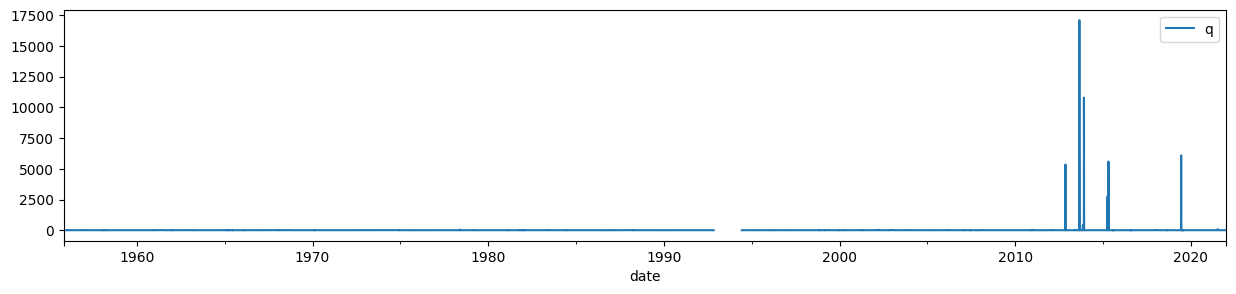

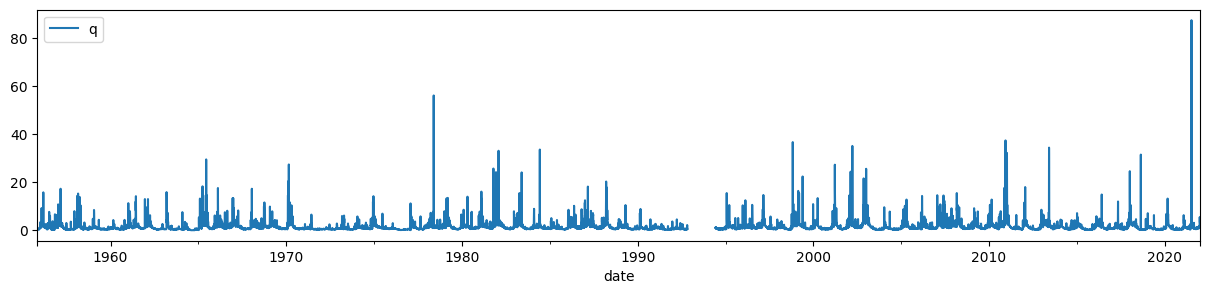

In [15]:
df = Station("DE214670").get_data()

df.plot(y="q", figsize=(15, 3))

# replace q values > 100
df.loc[df["q"] > 100, "q"] = None

df.plot(y="q", figsize=(15, 3))

# save to csv
df.to_csv(os.path.join(OUTPUT_PATH, "DE2/DE214670/DE214670_data.csv"))

Station DE412230 has values > 35 that are not plausible (looks like the sensor got taken out). We replace these with NaN.

<Axes: xlabel='date'>

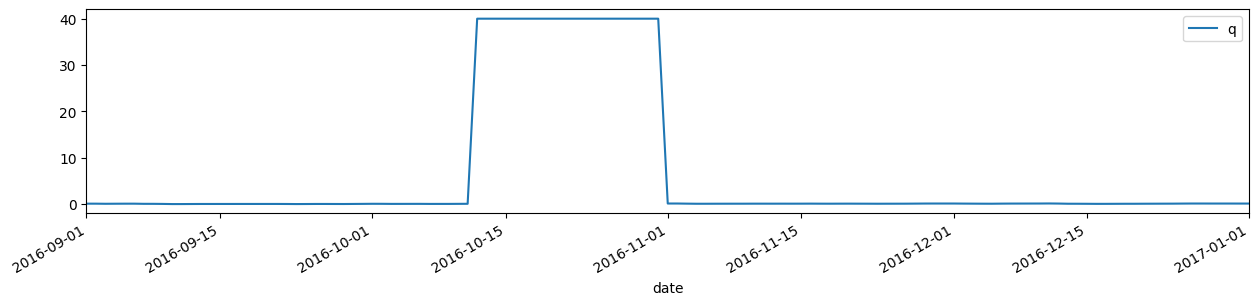

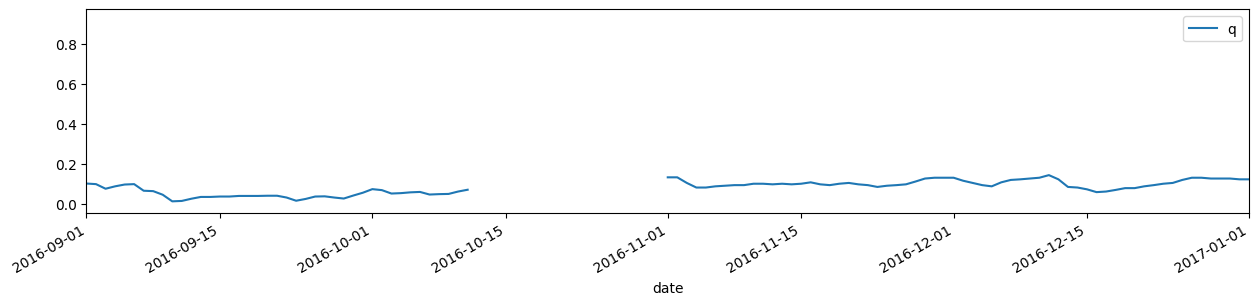

In [21]:
df = Station("DE412230").get_data()

df.plot(y="q", figsize=(15, 3), xlim=("2016-09-01", "2017-01-01"))

# replace q values > 35
df.loc[df["q"] > 35, "q"] = None

df.plot(y="q", figsize=(15, 3), xlim=("2016-09-01", "2017-01-01"))

# save to csv
df.to_csv(os.path.join(OUTPUT_PATH, "DE4/DE412230/DE412230_data.csv"))

Station `DE911240`: water_level values are actually just 1000 * discharge values. This is obviously an error (probably by the data provider), we replace all water level values with NaN.

In [8]:
df = Station("DE911240").get_data()

# check if w equals q * 1000
if (df["w"] == (df["q"] * 1000).round()).all():
    print("w equals q * 1000")

# replace entire w column with NaN
df["w"] = None

# save to csv
df.to_csv(os.path.join(OUTPUT_PATH, "DE9/DE911240/DE911240_data.csv"))

w equals q * 1000
